## Отчет по выполнению лаб. работы №1. 
### Шилкин Егор, 12 группа

### Задания

1. Реализовать программное средство, осуществляющее шифрование и дешифрование текстового файла, содержащего текст на заданном языке.
 - Реализовать программное средство, осуществляющее криптоанализ зашифрованного по методу Виженера текста. Для криптоанализа использовать тест Касиски.
 - Провести экспериментальное исследование зависимости вероятности успешного проведения атаки по методу Касиски от длины шифротекста.
 - Провести экспериментальное исследование зависимости вероятности успешного проведения атаки по методу Касиски от длины использованного при шифровании ключевого слова.


### Ход выполнения

1. Был подобран тестовый набор документов, состоящий из 4-х поэм Эдгара По.
2. Исходные документы подверглись предварительной обработке - токенизации. Были исключены знаки препинания и пробелы, а так же буквы были приведены к единому регистру.
3. Далее шифрование (функция encrypt). Функция приничает в качестве параметров исходный текст и ключ. На выходе получаем зашифрованный текст.
4. Начинаем криптологическую атаку. Сперва определяем с помощью теста Касиски длину ключа. Определяем l-граммы для l в интервале (3, 8). Далее находим НОД для всех расстояний между одинаковыми l-граммами и определяем длину ключа.
5. Как только длина ключа известна, можно переходить к определению самого ключа. Так как символы зашифрованы циклично с помощью ограниченного последовательного набора сдвигов, равному длине ключа, можно рассматривать группы символов с одинаковым сдвигом. Ищем среди этих групп символов наиболее часто встречаемый ищем разность по модулю с английским символом 'e' (т.к. в английском он встречается чаще всего). Получаем таким образом последовательно каждый из символов ключа.
6. Дешифруем исходный текст, зная ключ.
7. Анализ результатов экспериметнов приведен на графиках. Я изобразил графики для каждого из 4-х документов и таким образом можно проследить следующую закономерность: при длине ключа = 5 ни один из документов взломан не был. Линейная зависимость между длиной текста и вероятностью его взлома не прослеживается. Во многом это обусловлено недостаточным количеством и малой репрезентативности выборки исходных документов.


In [ ]:
import re
import string
from nltk.tokenize import RegexpTokenizer

alphabets = "abcdefghijklmnopqrstuvwxyz" 

def is_letter(c):
    if 97<=ord(c)<=122 or 64<=ord(c)<=90:
        return True
    return False


def tokenize_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tmp = ''.join(map(lambda x: x.casefold(),tokenizer.tokenize(text)))
    res = list(tmp)
    res = ''.join(filter(is_letter, res))
    return res

def encrypt(p, key):
    c = ""
    key_pos = [] 
    for x in key:
        key_pos.append(alphabets.find(x))
    i = 0
    for x in p:
        if i == len(key_pos):
            i = 0
        pos = alphabets.find(x) + key_pos[i] 
        if pos > 25:
            pos = pos-26               
        c += alphabets[pos].casefold()
        i +=1
    return c

In [ ]:
import math


def repeated_seq_pos(text, seq_len):
    seq_pos = {}
    for i, char in enumerate(text):
        next_seq = text[i:i + seq_len]
        if next_seq in seq_pos.keys():
            seq_pos[next_seq].append(i)
        else:
            seq_pos[next_seq] = [i]
    repeated = list(filter(lambda x: len(seq_pos[x]) >= 2, seq_pos))
    rep_seq_pos = [(seq, seq_pos[seq]) for seq in repeated]
    return rep_seq_pos


def get_spacings(positions):
    return [positions[i + 1] - positions[i] for i in range(len(positions) - 1)]


def fing_gcds(spacings):
    gcds = []
    for i in range(len(spacings)):
        for j in range(i + 1, len(spacings)):
            gcd = math.gcd(spacings[i], spacings[j])
            gcds.append(gcd)
    return gcds


def find_key_length(cyphertext):
    gcds = {}
    for i in range(3, 8):
        rsp = repeated_seq_pos(cyphertext, i)
        if rsp:
            seq_spc = []
            for _, positions in rsp:
                spacing = get_spacings(positions)
                for x in spacing:
                    if x not in seq_spc:
                        seq_spc.append(x)
            for gcd in fing_gcds(seq_spc):
                gcds[gcd] = gcds[gcd] + 1 if gcd in gcds.keys() else 1
        else:
            break
    gcds = sorted(gcds.items(), key=lambda kv: kv[1], reverse=True)
    return gcds[0][0] if gcds else 1


In [ ]:
def createDictlist():
    s = 97
    dictlist = {}
    for i in range(26):
        dictlist[chr(s)] = 0
        s += 1
    return dictlist


def findKey(start, period, text):
    dictlist = createDictlist()
    #f = open('inf.txt', 'r')
    symbCount = 0
    check = period - start
    for symbol in text:
        if symbol != ' ':
            if check == period:
                symbCount += 1
                dictlist[symbol] += 1
                check = 1
            else:
                check += 1
    mostlyUsed = ''
    temp = 0
    for symbol in dictlist:
        if dictlist[symbol] > temp:
            mostlyUsed = symbol
            temp = dictlist[symbol]
    if ord(mostlyUsed) - 101 < 0:
        return 26 + ord(mostlyUsed) - 101
    else:
        return ord(mostlyUsed) - 101


def decryptText(keylist, keylen, text):
    #f = open('inf.txt', 'r')
    fout = open('out.txt', 'w')
    keyInd = 0
    res = ''
    for symbol in text:
        if symbol != ' ':
            if ord(symbol) - keylist[keyInd] < 97:
                res+=chr(122 + (ord(symbol) - 96 - keylist[keyInd]))
                fout.write(chr(122 + (ord(symbol) - 96 - keylist[keyInd])))
            else:
                res+=chr(ord(symbol) - keylist[keyInd])
                fout.write(chr(ord(symbol) - keylist[keyInd]))
            keyInd += 1
            if keyInd == keylen:
                keyInd = 0
        else:
            #res+=' '
            fout.write(' ')

    return res

# keyLen = 0
# maxInd = 0

# for i in range(2, 30):
#     temp = coincidenceInd(i)
#     if temp > maxInd:
#         maxInd = temp
#         keyLen = i



In [ ]:
import os

In [ ]:
# keys = ['ab', 'dom', 'hello', 'supergood', 'veryverylongkey']
# for path in os.listdir('to_encrypt'):
#     print(path)
#     with open('to_encrypt/' + path, 'r') as f:
#         source_txt = f.read()
        
#     for key in keys[1:2]:
#         tokenized = tokenize_text(source_txt)
        
#         encrypted = encrypt(tokenized, key)
#         keylist = []
#         print(len(tokenized), len(encrypted))
#         keyLen = find_key_length(encrypted)

#         print(keyLen)
#         if keyLen == len(key):
#             for i in range(keyLen):
#                 keylist.append(findKey(i, keyLen, encrypted))
#             out = decryptText(keylist, keyLen, encrypted)   
#         if out != tokenized:
            
#             print(len(out),len(source_txt))
#             for i in range(len(out)):
#                 if(out[i]!=tokenized[i]):
#                     print(out[i],tokenized[i], i)
#             print(tokenized)
#         else:
#             print('oh no', key, len(tokenized))
        

# #encrypted = encrypt(source_txt[:len(source_txt)//2], 'rob')

In [ ]:
keys = ['v', 've', 'ver', 'very', 'veryl', 'verylo', 'verylon', 'verylong']

In [ ]:

key_scores = []
for path in os.listdir('to_encrypt'):
    key_scores.append(dict(zip([len(key) for key in keys], [0 for i in range(len(keys))])))
    print(path)
    with open('to_encrypt/' + path, 'r') as f:
        source_txt = f.read()
    
        
    for key in keys:
        tokenized = tokenize_text(source_txt)
        encrypted = encrypt(tokenized, key)
        keylist = []
        
        keyLen = find_key_length(encrypted)

        if keyLen == len(key):
            for i in range(keyLen):
                keylist.append(findKey(i, keyLen, encrypted))
            out = decryptText(keylist, keyLen, encrypted)
            if out==tokenized:
                key_scores[-1][len(key)]+=1
            
        else:
            print('failed:',key, len(tokenized))
        

#encrypted = encrypt(source_txt[:len(source_txt)//2], 'rob')

1.txt
failed: verylon 1814
failed: verylong 1814
2.txt
failed: verylong 2709
3.txt
failed: verylong 1151
4.txt
failed: verylo 320
failed: verylong 320


In [ ]:
!python -V

Python 3.7.9


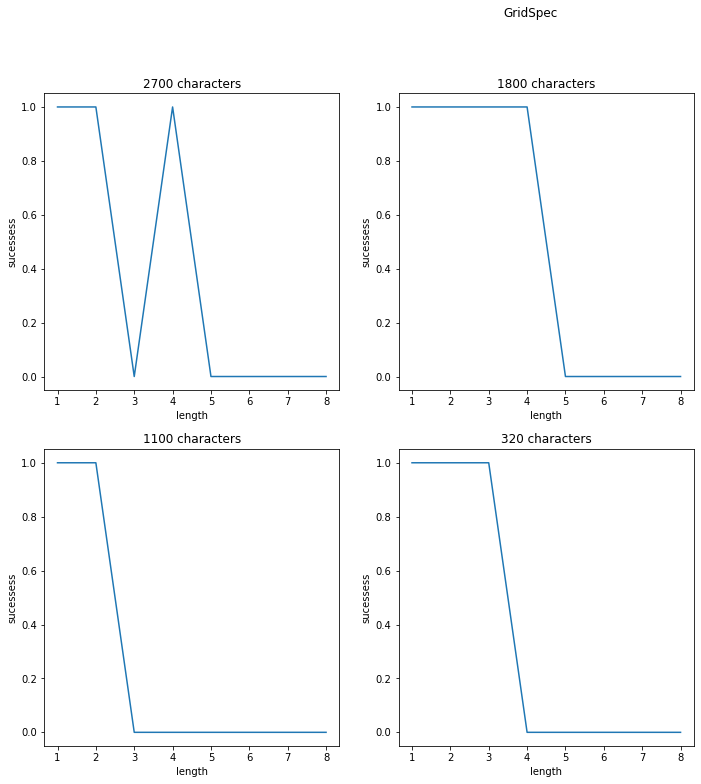

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(18,12),constrained_layout=False)

gs = gridspec.GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
#ax5 = fig.add_subplot(gs[1, 2])

ax1.plot(key_scores[0].keys(), key_scores[0].values())
ax1.title.set_text('2700 characters')
ax1.set_xlabel('length')
ax1.set_ylabel('sucessess')
ax2.plot(key_scores[1].keys(), key_scores[1].values())
ax2.title.set_text('1800 characters')
ax2.set_xlabel('length')
ax2.set_ylabel('sucessess')
ax3.plot(key_scores[2].keys(), key_scores[2].values())
ax3.title.set_text('1100 characters')
ax3.set_xlabel('length')
ax3.set_ylabel('sucessess')
ax4.plot(key_scores[3].keys(), key_scores[3].values())
ax4.title.set_text('320 characters')
ax4.set_xlabel('length')
ax4.set_ylabel('sucessess')
fig.suptitle("GridSpec")

plt.show()